**Student name:** Muhammad Khubaib Akram

**Student id:** 23098929

# Task: Deep neural networks

#### Imports

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the data an manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [22]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Let's also visualise a few random samples of this

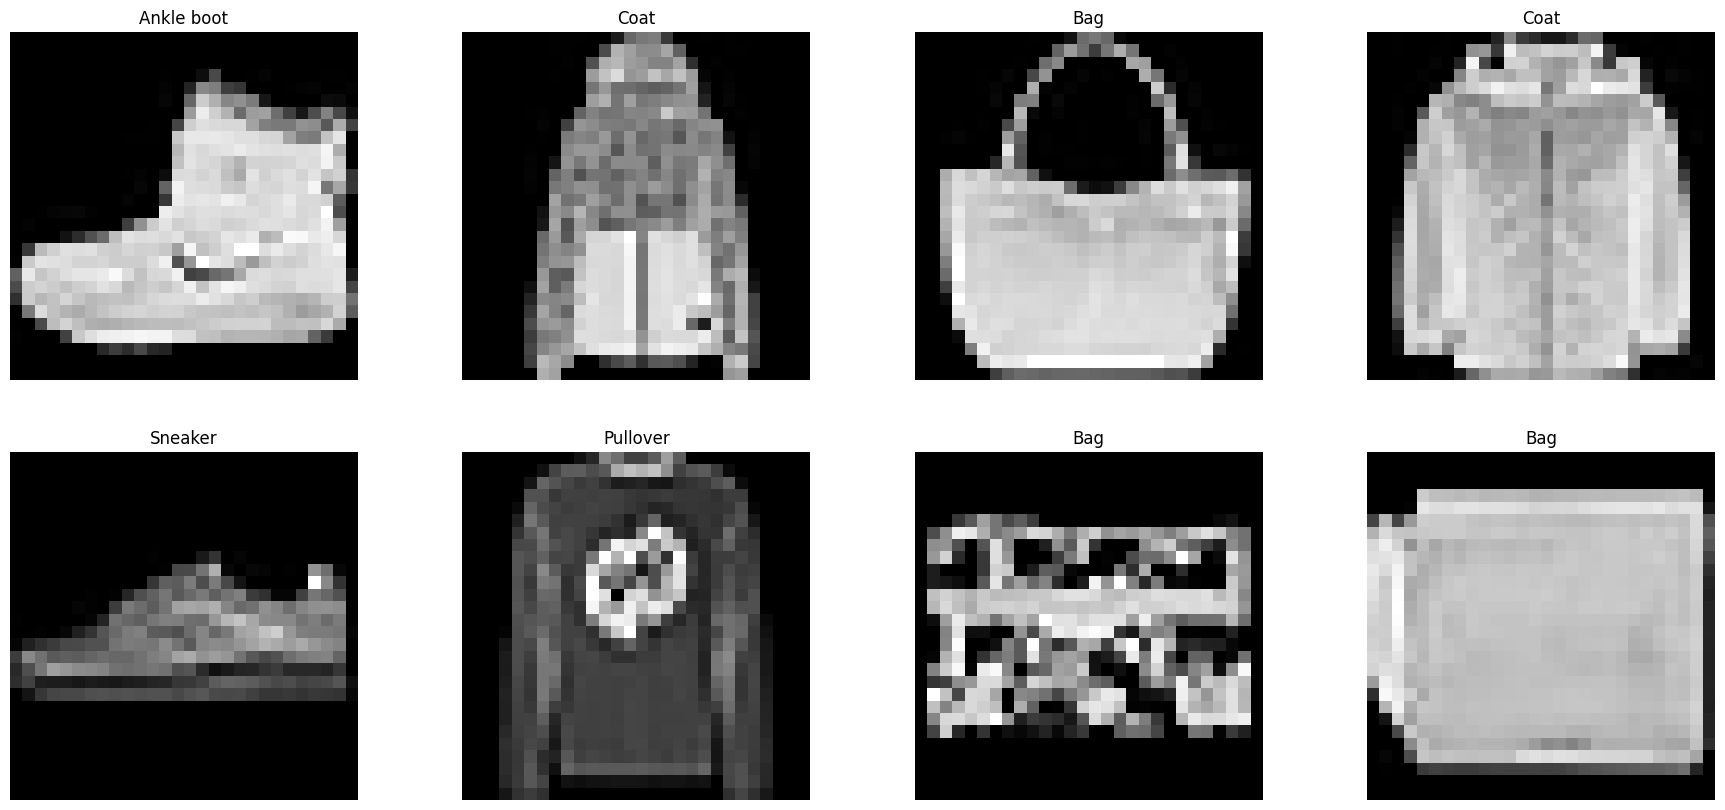

In [23]:
# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

<span style="color:red">Insert your code below</span>.

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Train/test spliting the data
random_state = 41
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Standardized the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

<span style="color:red">Insert your code below</span>.

1- A single artifical neuron is a Perceptron, so use sklearn's implementation of the Percpetron, and train it

In [35]:
from sklearn.linear_model import Perceptron as Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix

# 1- Creating a Perceptron model
pptn = Perceptron(random_state=random_state)

# Training the model
pptn.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = pptn.predict(X_test_scaled)

2- Calculate and print the accuracy

In [36]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.3f}%")


Accuracy: 77.943%


3- Discuss the result, does it seem good or bad?

  ------
  It giving 77.943 accuracy. Its acceptable but not good if we compare to advance classifier but as a single perceptron it good.


4- Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)

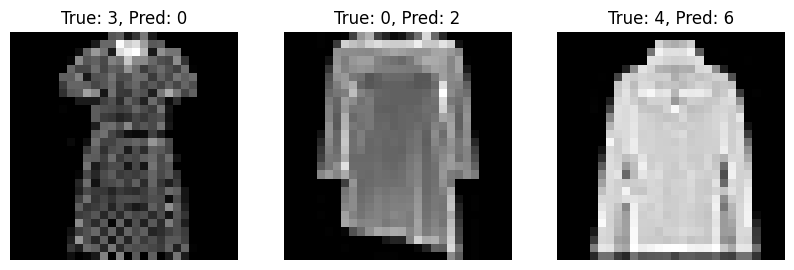

In [40]:
incorrect_indices = np.where(y_test != y_pred)[0]
# Visualize some of the incorrectly classified instances
plt.figure(figsize=(10, 5))
for i, index in enumerate(incorrect_indices[:3]):  # Visualizing the first 5 incorrect instances
    plt.subplot(1, 3, i + 1)
    plt.imshow(np.reshape(X_test[index], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    plt.title(f"True: {y_test[index]}, Pred: {y_pred[index]}")
    plt.axis('off')
plt.show()

<font color='red'>Enter your text here</font>

3- The accuracy score is not good. It's giving 77.943 accuracy. Its acceptable but not good. There are many misclassification such an incorrect classification example is shown above.

4- In the example of Incorrect classification,
 *  First incorrect classification is predicted as T-Shirt/Top(0) but actually it an Dress(3)
 * Second incorrect classification is predicted as pullover(2) but in actual its a T-shirt/Top(0)
 * Third incorrect classification is predicted as coat(4) but in actual its a shirt


5- In multi-class classification, the Perceptron learns to classify data into more than two classes. One way to do this is to use the One-vs-All (OvA) approach, where we train C two-class classifiers, one for each class, and then combine them to make a multi-class classifier. Another way is to use the All-vs-All (AvA) approach, where we train C(C−1)/2 two-class classifiers, one for each pair of classes, and then combine them to make a multi-class classifier. The AvA approach is computationally expensive and is not used as often as the OvA approach.

In the OvA approach, we train C two-class classifiers, one for each class. During training, we assign a positive label to the data points belonging to the current class and a negative label to the data points belonging to all other classes. We then train the two-class classifier on this labeled data. During testing, we apply all C classifiers to the test data and choose the class with the highest score as the predicted class. The score of a class is the output of the corresponding two-class classifier.

The cost function for the multi-class Perceptron is similar to that of the binary Perceptron. However, instead of a single weight vector, we have C weight vectors, one for each class. During training, we update the weight vector of the classifier corresponding to the true class of the misclassified data point. The weight vectors of the other classifiers remain unchanged. The weight vectors are updated using the Perceptron update rule.



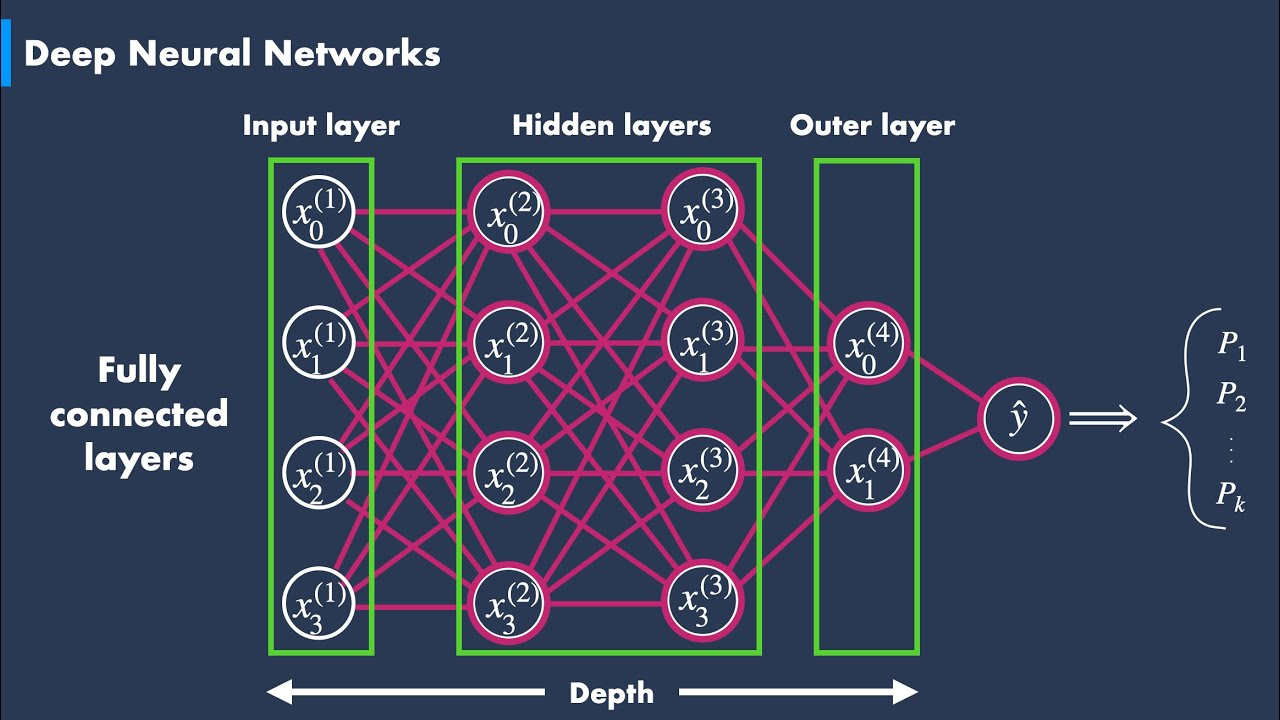

The accuracy is not too bad for a simple linear classifier. However, as with all of these types of problems, most of the effort will go into gaining small, but important imporvements. Let's see if we can make it better.

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,).

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

<span style="color:red">Insert your code below</span>.

In [12]:
from sklearn.neural_network import MLPClassifier

#######################
# Creating an MLP model
mlp_C = MLPClassifier(hidden_layer_sizes=(20,), alpha=0.1, verbose=1, random_state=1)

# Training the model
mlp_C.fit(X_train_scaled, y_train)

# Making the predictions on the test set
y_pred_mlp = mlp_C.predict(X_test_scaled)

Iteration 1, loss = 0.63982681
Iteration 2, loss = 0.43309333
Iteration 3, loss = 0.39753066
Iteration 4, loss = 0.37727725
Iteration 5, loss = 0.36473861
Iteration 6, loss = 0.35406314
Iteration 7, loss = 0.34652351
Iteration 8, loss = 0.34180317
Iteration 9, loss = 0.33441681
Iteration 10, loss = 0.33036474
Iteration 11, loss = 0.32661593
Iteration 12, loss = 0.32187934
Iteration 13, loss = 0.31980492
Iteration 14, loss = 0.31658098
Iteration 15, loss = 0.31249897
Iteration 16, loss = 0.31143816
Iteration 17, loss = 0.30885581
Iteration 18, loss = 0.30687183
Iteration 19, loss = 0.30333655
Iteration 20, loss = 0.30351777
Iteration 21, loss = 0.30051948
Iteration 22, loss = 0.29833242
Iteration 23, loss = 0.29844625
Iteration 24, loss = 0.29638867
Iteration 25, loss = 0.29463795
Iteration 26, loss = 0.29338758
Iteration 27, loss = 0.29279986
Iteration 28, loss = 0.29166540
Iteration 29, loss = 0.29030085
Iteration 30, loss = 0.28960588
Iteration 31, loss = 0.28718995
Iteration 32, los

In [13]:
from sklearn.metrics import accuracy_score

#######################
# Your accuracy score code here
training_accuracy = accuracy_score(y_train, mlp_C.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, y_pred_mlp)

print(f"Training Accuracy: {training_accuracy * 100:.3f}%")
print(f"Test Accuracy: {test_accuracy * 100:.3f}%")

Training Accuracy: 92.641%
Test Accuracy: 86.979%


#### Questions: (answer here)

1. What is the size of the input layer here? Explain
2. What is the size of the output layer here? Explain
3. How many weights in total does the algorithm learn?
4. What does it mean that the training accuracy and the test accuracy are different?

<font color='red'>Enter your text here</font>



1.  **What is the size of the input layer here?  Explain**

  In the case of a 28x28 grayscale image associated with labels from 10 classes, the size of the input layer for a multiclass perceptron would be determined by the number of pixels in the image. Each pixel serves as a feature, and there are 28 * 28 = 784 pixels in a 28x28 image.Therefore, the size of the input layer would be 784 neurons.

2.   **What is the size of the output layer here? Explain**

  The size of the output layer in a neural network is dictated by the number of classes present in the dataset. In our case, there are 10 distinct classes of clothing items, hence the output layer comprises 10 nodes.

3. **How many weights in total does the algorithm learn?**

  In a fundamental Perceptron model, each input node is connected to every output node, with each connection representing a weight. So, the total number of weights is the product of the number of input nodes and output nodes.

  There are 784 input nodes (each pixel serves as a feature, and there are 28 * 28 = 784 pixels in a 28x28 image, so the size of the input layer would be 784 neurons) and 10 output nodes, the total number of weights is 784 x 10 = 7840.

  Moreover, each output node has a bias term, which adds another 10 parameters which makes the total number of parameters (weights + biases) that the algorithm learns is 7,840 + 10 = 7,850.

4. **What does it mean that the training accuracy and the test accuracy are different?**

    Training Accuracy: This is the model’s accuracy on the dataset used for its training. It gauges how well the model predicts the labels of the data it was exposed to during training. A high training accuracy implies that the model has effectively learned the patterns in the training data.

    Test Accuracy: This is the model’s accuracy on a distinct dataset that wasn’t part of the training process. This dataset, known as the test set, is utilized to assess the model’s generalization capability. A high test accuracy signifies that the model can make precise predictions on new, unseen data.





#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 200)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

<font color='red'>Enter your code here</font>

In [14]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress the specific warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import time


########################
# Your classifier training code here

a_test = []
a_train = []

widths = (20, 50, 100, 200)

# Initialize lists to store training and test accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different widths
for width in widths:
    # Record the start time
    start_time = time.time()
    # Create an MLP model with the specified width
    mlpC = MLPClassifier(hidden_layer_sizes=(width,), alpha=0.001, random_state=42)

    # Training the model
    mlpC.fit(X_train_scaled, y_train)

    # Calculating training and test accuracies
    train_accuracy = accuracy_score(y_train, mlpC.predict(X_train_scaled))
    test_accuracy = accuracy_score(y_test, mlpC.predict(X_test_scaled))

    # Recording the end time
    end_time = time.time()

    # Calculating the elapsed time
    elapsed_time = end_time - start_time

    print(f"Width: {width}, Training Accuracy: {train_accuracy * 100:.3f}%, Test Accuracy: {test_accuracy * 100:.3f}%, Time taken: {elapsed_time/60:.3f} mins")

    # Appending accuracies to lists
    a_train.append(train_accuracy)
    a_test.append(test_accuracy)


Width: 20, Training Accuracy: 95.298%, Test Accuracy: 85.500%, Time taken: 3.359 mins
Width: 50, Training Accuracy: 99.177%, Test Accuracy: 86.714%, Time taken: 3.421 mins
Width: 100, Training Accuracy: 99.711%, Test Accuracy: 88.579%, Time taken: 4.181 mins
Width: 200, Training Accuracy: 99.005%, Test Accuracy: 88.521%, Time taken: 4.501 mins


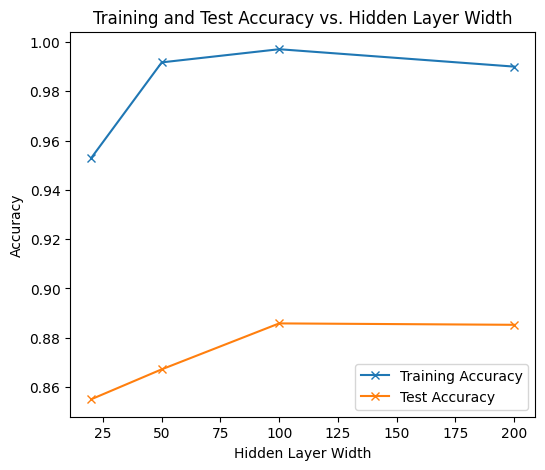

In [42]:
import matplotlib.pyplot as plt

########################
# Your plot of training and test accuracy here
plt.figure(figsize=(6, 5))
plt.plot(widths, a_train, label='Training Accuracy', marker='x')
plt.plot(widths, a_test, label='Test Accuracy', marker='x')
plt.title('Training and Test Accuracy vs. Hidden Layer Width')
plt.xlabel('Hidden Layer Width')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.
Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

2. What can you infer from the graph?

For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

<font color='red'>Enter your text here</font>

When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

For widht 20, it took the minimun time 3.359 mins, as we increased the widht the time it took train increased gradually.

Width: 20, Training Accuracy: 95.298%, Test Accuracy: 85.500%, Time taken: 3.359 mins
Width: 50, Training Accuracy: 99.177%, Test Accuracy: 86.714%, Time taken: 3.421 mins
Width: 100, Training Accuracy: 99.711%, Test Accuracy: 88.579%, Time taken: 4.181 mins
Width: 200, Training Accuracy: 99.005%, Test Accuracy: 88.521%, Time taken: 4.501 mins


**What can you infer from the graph?**

Insights from the Graph:


  **Optimal Number of Neurons:** The graph indicates that the training accuracy is highest for the smallest network width and slightly decreases as the width expands. Conversely, the test accuracy rises with the width of the hidden layer up to a certain point, after which it levels off. The optimal number of neurons, considering the balance between performance and complexity, appears to be around the point where test accuracy begins to plateau. This is because increasing neurons beyond this point does not result in significant improvements in test accuracy.


  **Weights Learned in the Optimal Solution**: To ascertain the number of weights learned by the optimal solution, we would need to know the precise architecture of the network. Assuming the optimal width is where the test accuracy plateaus, we would calculate the number of weights as the product of the number of neurons in the input layer (784 for Fashion-MNIST images), the number of neurons in the hidden layer (at the plateau point), and the number of neurons in the output layer (10 for the 10 classes of Fashion-MNIST), plus the biases for each neuron in the hidden and output layers.


  **Indications of Overfitting:** The graph displays a divergence between training and test accuracy, with the training accuracy consistently higher. This could suggest overfitting, particularly for larger network widths where the training accuracy is high, but the test accuracy does not improve correspondingly. Overfitting implies that the model may be learning the noise and details in the training data to such an extent that it negatively affects its performance on new, unseen data.

## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

<font color='red'>Enter your code here</font>

In [43]:
# Your classifier training code here

layer_configs = ((20,20),(20,20,20),(50,20),(100,100,50))

a_test = []
a_train = []

# Iterating over the different layer configurations
for layers in layer_configs:
  # Creating an MLP model with the specified layers
  mlpC = MLPClassifier(hidden_layer_sizes=layers, alpha=0.001, random_state=42)

  # Training the model
  mlpC.fit(X_train_scaled, y_train)

  # Calculating the train and test accuracies
  train_accuracy = accuracy_score(y_train, mlpC.predict(X_train_scaled))
  test_accuracy = accuracy_score(y_test, mlpC.predict(X_test_scaled))

  # Appending accuracies to lists
  a_train.append(train_accuracy)
  a_test.append(test_accuracy)

  print(f"Layers: {layers}, Training Accuracy: {train_accuracy * 100:.3f}%, Test Accuracy: {test_accuracy * 100:.3f}%")

Layers: (20, 20), Training Accuracy: 96.250%, Test Accuracy: 85.536%
Layers: (20, 20, 20), Training Accuracy: 96.182%, Test Accuracy: 85.714%
Layers: (50, 20), Training Accuracy: 98.389%, Test Accuracy: 86.586%
Layers: (100, 100, 50), Training Accuracy: 99.314%, Test Accuracy: 88.871%


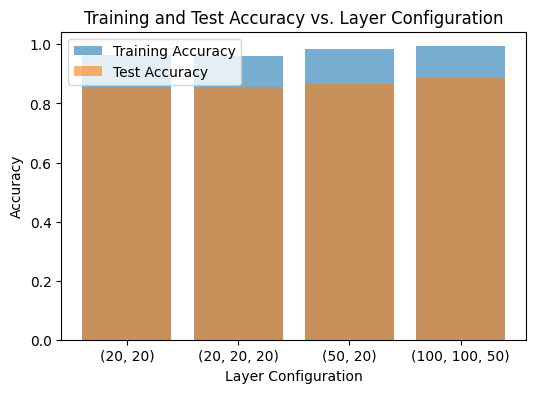

In [44]:
########################
# Your visualisation code here

plt.figure(figsize=(6, 4))
layer_labels = [str(layers) for layers in layer_configs]
plt.bar(layer_labels, a_train, label='Training Accuracy', alpha=0.6)
plt.bar(layer_labels, a_test, label='Test Accuracy', alpha=0.6)
plt.title('Training and Test Accuracy vs. Layer Configuration')
plt.xlabel('Layer Configuration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Questions

What can you infer from the graph? (answer in the text box here).

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?

<font color='red'>Enter your text here</font>

From the provided accuracies and the graph, here are some inferences:

**Deeper Network vs. Wide Network:**

  The graph shows that the network with the configuration (100, 100, 50) achieves the highest test accuracy, which suggests that a deeper network with more layers and a moderate number of neurons in each layer can perform better than shallower networks. It indicates that depth, along with a certain breadth, provides a better capability for the network to capture the complexities of the data.
  Interestingly, the (20, 20) configuration performs better in terms of test accuracy than the (20, 20, 20), despite being shallower. This could imply that adding additional layers without increasing the breadth may not always lead to improved performance, especially if the network becomes too deep for the complexity of the task at hand.

Weights Trained:

  For each layer configuration, the total number of weights and biases that need to be trained is calculated by considering the connections between layers, including the biases for each neuron. Here's how you would calculate it for each configuration:
  
      For (20, 20): (784×20+20)+(20×20+20)+(20×10+10)=16,530(784×20+20)+(20×20+20)+(20×10+10)=16,530 weights and biases.
      For (20, 20, 20): (784×20+20)+(20×20+20)+(20×20+20)+(20×10+10)=16,550(784×20+20)+(20×20+20)+(20×20+20)+(20×10+10)=16,550 weights and biases.
      For (50, 20): (784×50+50)+(50×20+20)+(20×10+10)=40,020(784×50+50)+(50×20+20)+(20×10+10)=40,020 weights and biases.
      For (100, 100, 50): (784×100+100)+(100×100+100)+(100×50+50)+(50×10+10)=88,460(784×100+100)+(100×100+100)+(100×50+50)+(50×10+10)=88,460 weights and biases.

The (100, 100, 50) configuration, being the deepest and widest, requires training the most significant number of weights and biases. The efficiency of a network isn't just about having the highest test accuracy but also about achieving that accuracy with as few parameters as necessary to avoid overfitting and excessive computational cost.

The graph shows that as we increase the complexity of the network, we see an increase in test accuracy up to a point, indicating that a more complex model captures the data's nuances better. However, this comes at the cost of training more weights, which can lead to overfitting, as indicated by the higher training accuracy compared to the test accuracy, especially for the most complex network (100, 100, 50).

To reduce overfitting, methods like adding dropout, implementing early stopping, or increasing the strength of regularization can be employed. Additionally, collecting more training data or performing data augmentation can improve the generalization ability of the network.

## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.

<font color='red'>Enter your code here</font>

Test Accuracy (Best Model): 88.87%


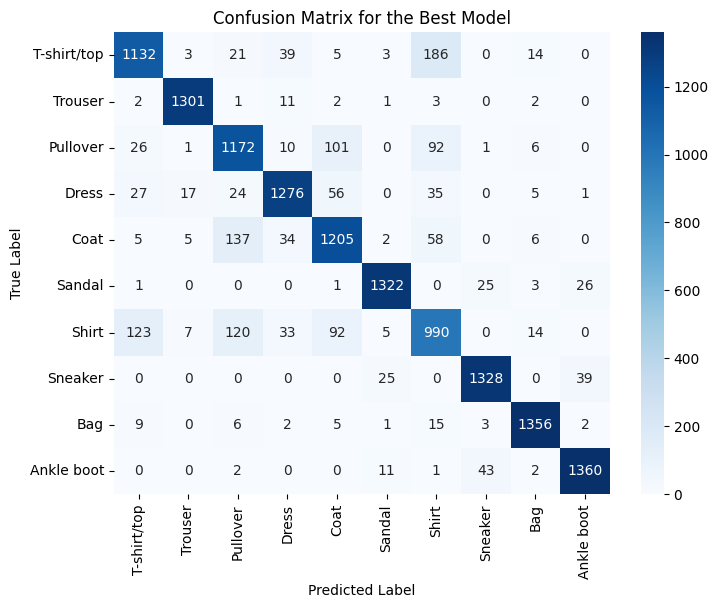

In [45]:
import seaborn as sns
########################
# Your code here

# Selected the best-performing configuration
best_layers = (100, 100, 50)

# Creating and training the best model
best_model = MLPClassifier(hidden_layer_sizes=best_layers, alpha=0.001, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_best = best_model.predict(X_test_scaled)

# Calculating the test accuracy
test_accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Test Accuracy (Best Model): {test_accuracy_best * 100:.2f}%")

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Ploting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=text_labels, yticklabels=text_labels)
plt.title('Confusion Matrix for the Best Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<font color='red'>Enter your text here</font>

The confusion matrix provides a detailed breakdown of a classifier's performance across all classes. Here's an analysis of what's presented:

**Classes Doing Well**:
    The Trouser class is classified very accurately, with 1383 out of 1400 predictions being correct.
    Similarly, Sneaker, Bag, and Ankle boot are also performing well with high true positive counts of 1313, 1299, and 1338, respectively.

**Classes Doing Poorly:**
    The Shirt class has the most misclassifications, with 220 instances being incorrectly predicted as T-shirt/top and 112 as Pullover. It has the lowest true positive count at 954, indicating it is the most challenging class for the model to classify correctly.
    Pullover, Coat, and Dress have a relatively high number of false positives and false negatives, indicating moderate confusion in these classes.

**Classes That Get Mixed Up:**
    Shirt is often confused with T-shirt/top, Pullover, and Coat. This suggests that the model has difficulty distinguishing between these classes, possibly due to similarities in their features.
    Pullover and Coat are sometimes confused with each other, which is again likely due to the similarity in the appearance of these clothing items.
    T-shirt/top is occasionally confused with Shirt, and Dress is mixed up with Coat, though to a lesser extent.

The overall pattern suggests that the model is quite accurate for items that have distinctive features, such as trousers and bags, which are less likely to be confused with other apparel. However, for items that have a similar shape or design, such as shirts, pullovers, and coats, the model struggles more.